In [1]:
import pandas as pd
import os
import numpy as np
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D,ZeroPadding2D,AveragePooling2D
from keras.utils import np_utils
import cv2
import skimage
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
os.getcwd()

'C:\\Users\\AnKajVi\\Desktop\\ASL'

In [3]:
os.chdir('./data/train')

In [31]:
import cv2

In [36]:
lower = np.array([141,85,36], dtype="uint8")
upper = np.array([224,172,105], dtype="uint8")

In [ ]:
converted = cv2.cvtColor(img)

In [58]:
import cv2
def mask(img_path):
    upper = np.array([255,218,172], dtype="uint8")
    lower = np.array([38,10,15], dtype="uint8")
    img = cv2.imread(img_path)
    converted = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    skinMask = cv2.inRange(converted, lower, upper)
    skin = cv2.cvtColor(skinMask, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return skin

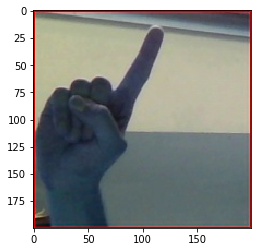

In [65]:
img = mask('./z/z1.jpg')

## Let's try masking 

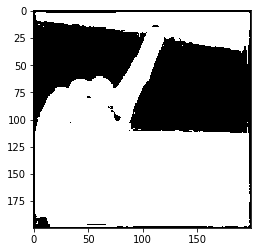

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(img)
plt.show()

## It doesn't seem that masking will do good, so let's ty edge detection

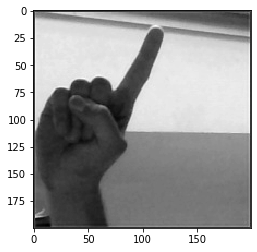

In [72]:
img = cv2.imread('./z/z1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

## First let's try vertical edge detection first

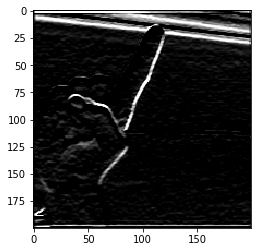

In [74]:
sobel_y = np.array([[ -1, 0, 1], 
                   [ -1, 0, 1], 
                   [ -1, 0, 1]])
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

### Seems, we are going in the right direction, but we are also getting some horizontal edges, let's make it more strict to vertical edge


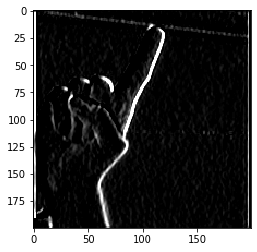

In [75]:
sobel_y = np.array([[ -3, 0, 3], 
                   [ -3, 0, 3], 
                   [ -3, 0, 3]])
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

### Seems good but I doubt only vertical edge will work on characters like p,q ,space and other with major horizontal edge, so let's try a combination of two

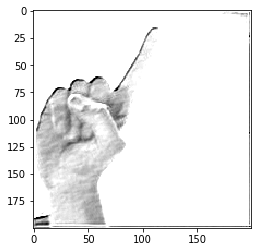

In [78]:
sobel_y = np.array([[ -1, 0, -1], 
                   [ -3, 0, 3], 
                   [ 3, 0, 3]])
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

### Seem's preety good and I think it will work very well, let's check this filter on all characters

A1.jpg
(200, 200)


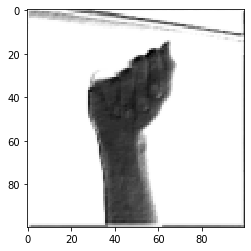

B1.jpg
(200, 200)


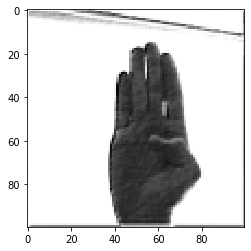

C1.jpg
(200, 200)


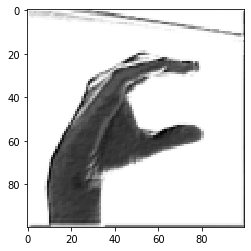

D1.jpg
(200, 200)


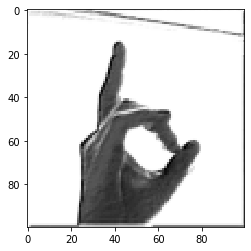

del1.jpg
(200, 200)


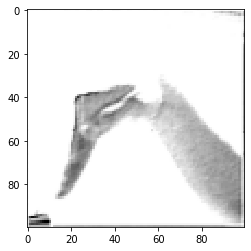

E1.jpg
(200, 200)


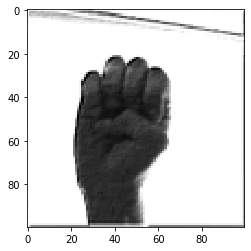

F1.jpg
(200, 200)


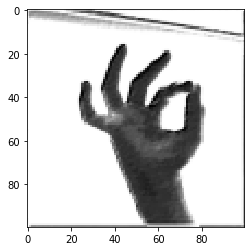

G1.jpg
(200, 200)


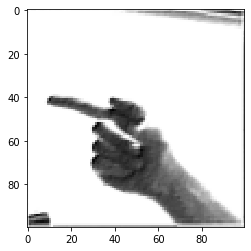

H1.jpg
(200, 200)


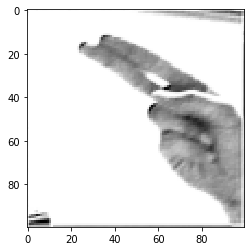

I1.jpg
(200, 200)


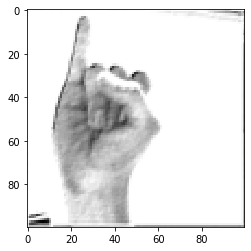

J1.jpg
(200, 200)


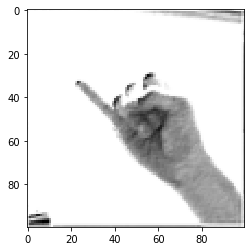

K1.jpg
(200, 200)


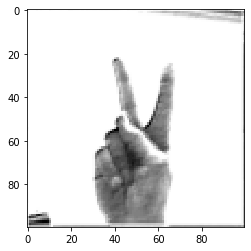

L1.jpg
(200, 200)


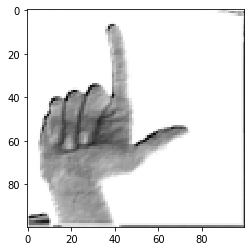

M1.jpg
(200, 200)


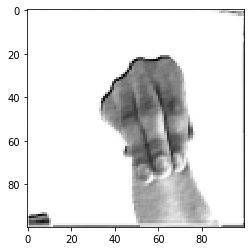

N1.jpg
(200, 200)


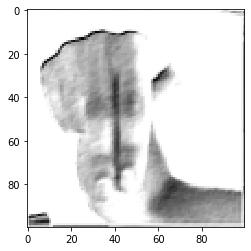

nothing1.jpg
(200, 200)


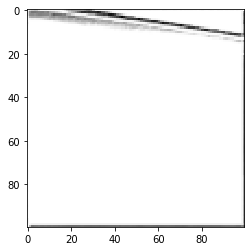

O1.jpg
(200, 200)


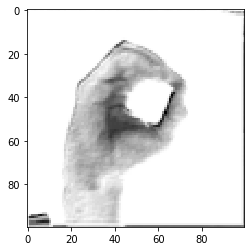

P1.jpg
(200, 200)


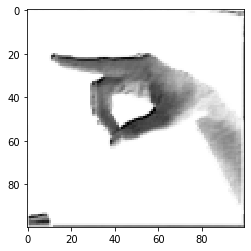

Q1.jpg
(200, 200)


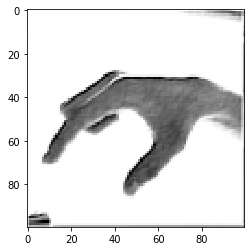

R1.jpg
(200, 200)


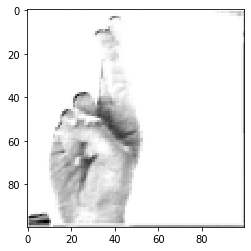

S1.jpg
(200, 200)


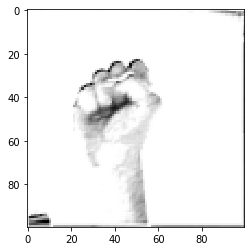

space1.jpg
(200, 200)


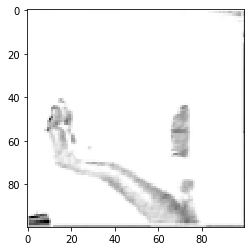

T1.jpg
(200, 200)


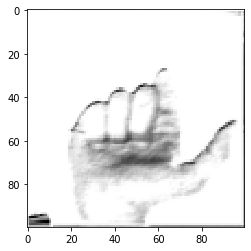

U1.jpg
(200, 200)


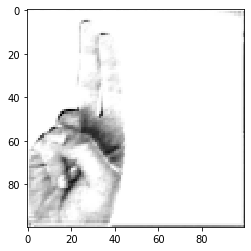

V1.jpg
(200, 200)


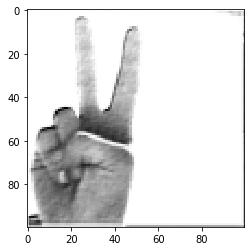

W1.jpg
(200, 200)


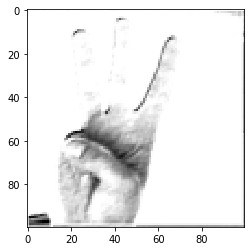

X1.jpg
(200, 200)


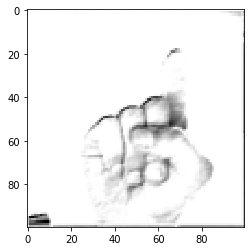

Y1.jpg
(200, 200)


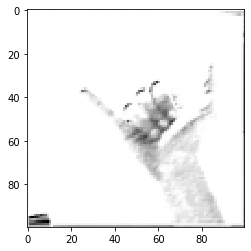

Z1.jpg
(200, 200)


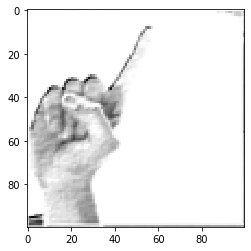

In [96]:
for char in os.listdir('./'):
    for img_path in os.listdir('./'+char+'/'):
        print(img_path)
        img = cv2.imread('./'+char+'/'+img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        plt.imshow(gray, cmap='gray')  
        sobel_y = np.array([[ -1, 0, -1], 
                           [ -3, 0, 3], 
                           [ 3, 0, 3]])
        filtered_image = cv2.filter2D(gray, -1, sobel_y)
        print(filtered_image.shape)
        img_file = skimage.transform.resize(filtered_image, (100,100))
        
        plt.imshow(img_file, cmap='gray')
        plt.show()
        break

### Yes, that's preety ipressive for all the filters

In [201]:
def get_data(start,end):
    print("Reading Files")
    x=[]
    y=[]
    vv=-1
    d=0
    for f in os.listdir("./"):
        vv=vv+1
        if vv%10==0:
            print(f"Files Completed: {vv}")
        if f in ['A']:
            label=0
        elif f in ['B']:
            label=1
        elif f in ['C']:
                label=2
        elif f in ['D']:
            label=3
        elif f in ['E']:
            label=4
        elif f in ['F']:
            label=5
        elif f in ['G']:
            label=6
        elif f in ['H']:
            label=7
        elif f in ['I']:
            label=8
        elif f in ['J']:
            label=9
        elif f in ['K']:
            label=10
        elif f in ['L']:
            label=11
        elif f in ['M']:
            label=12
        elif f in ['N']:
            label=13
        elif f in ['O']:
            label=14
        elif f in ['P']:
            label=15
        elif f in ['Q']:
            label=16
        elif f in ['R']:
            label=17
        elif f in ['S']:
            label=18
        elif f in ['T']:
            label=19
        elif f in ['U']:
            label=20
        elif f in ['V']:
            label=21
        elif f in ['W']:
            label=22
        elif f in ['X']:
            label=23
        elif f in ['Y']:
            label=24
        elif f in ['Z']:
            label=25
        elif f in ['del']:
            label=26
        elif f in ['nothing']:
            label=27
        elif f in ['space']:
            label=28
        else:
            label=29
        s1=-1
        for image in os.listdir('./'+f):
            d=d+1
            s1+=1
            if s1<start:
                continue
            if s1>end:
                break
            img_file=cv2.imread('./'+f+'/'+image)
            img_file=cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
            sobel_y = np.array([[ -1, 0, -1], 
                                [ -3, 0, 3], 
                                [ 3, 0, 3]])
            img_file = cv2.filter2D(img_file, -1, sobel_y)
            if img_file is not None:
                
                img_file = skimage.transform.resize(img_file, (50,50,1))
                img_arr = np.asarray(img_file)
                x.append(img_arr)
                y.append(label)
            
    x=np.asarray(x)
    y=np.asarray(y)
    print("Reading Completed")
    return x,y

In [203]:
x,y=get_data(0,150)
y=np_utils.to_categorical(y,num_classes=30)
print(y)
x,y= shuffle(x,y,random_state=13)
print(x.shape)
print(y.shape)

Reading Files
Files Completed: 0
Files Completed: 10
Files Completed: 20
Reading Completed
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4379, 50, 50, 1)
(4379, 30)


In [188]:
def get_model():
    model=Sequential()
    model.add(Conv2D(32,(2,2),padding='same',input_shape=(50,50,1)))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(2,2),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128,(2,2),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256,(2,2),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    model.add(Conv2D(512,(2,2),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(512,(2,2),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(30,activation='softmax'))  
    return model

In [189]:
model = get_model()

In [190]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 50, 50, 32)        160       
_________________________________________________________________
activation_41 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 50, 50, 64)        8256      
_________________________________________________________________
activation_42 (Activation)   (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 128)       32896     
__________

In [198]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

filepath="model4.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model.fit(x,y,epochs=40,batch_size=32,verbose=1,callbacks=callbacks_list)
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

Epoch 1/40
4379/4379 [==============================] - 6s 1ms/step - loss: 3.3880 - acc: 0.0290

Epoch 00001: loss improved from inf to 3.38797, saving model to model4.h5
Epoch 2/40
4379/4379 [==============================] - 5s 1ms/step - loss: 3.3447 - acc: 0.0340

Epoch 00002: loss improved from 3.38797 to 3.34465, saving model to model4.h5
Epoch 3/40
4379/4379 [==============================] - 5s 1ms/step - loss: 2.8093 - acc: 0.1098

Epoch 00003: loss improved from 3.34465 to 2.80934, saving model to model4.h5
Epoch 4/40
4379/4379 [==============================] - 5s 1ms/step - loss: 2.2670 - acc: 0.2628

Epoch 00004: loss improved from 2.80934 to 2.26699, saving model to model4.h5
Epoch 5/40
4379/4379 [==============================] - 5s 1ms/step - loss: 1.8135 - acc: 0.4145

Epoch 00005: loss improved from 2.26699 to 1.81346, saving model to model4.h5
Epoch 6/40
4379/4379 [==============================] - 5s 1ms/step - loss: 1.4812 - acc: 0.5097

Epoch 00006: loss improved

#### Let's see if more training the model works...

In [211]:
#LET'S TRY SOME MORE TRAINING...
model2 = model

In [212]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

filepath="../model2.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model2.fit(x,y,epochs=40,batch_size=32,verbose=1,callbacks=callbacks_list)
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

Epoch 1/40
4379/4379 [==============================] - 6s 1ms/step - loss: 0.2748 - acc: 0.9018

Epoch 00001: loss improved from inf to 0.27480, saving model to ../model2.h5
Epoch 2/40
4379/4379 [==============================] - 5s 1ms/step - loss: 0.2810 - acc: 0.8988

Epoch 00002: loss did not improve from 0.27480
Epoch 3/40
4379/4379 [==============================] - 5s 1ms/step - loss: 0.2408 - acc: 0.9098

Epoch 00003: loss improved from 0.27480 to 0.24076, saving model to ../model2.h5
Epoch 4/40
4379/4379 [==============================] - 5s 1ms/step - loss: 0.2575 - acc: 0.9043

Epoch 00004: loss did not improve from 0.24076
Epoch 5/40
4379/4379 [==============================] - 5s 1ms/step - loss: 0.2561 - acc: 0.9009

Epoch 00005: loss did not improve from 0.24076
Epoch 6/40
4379/4379 [==============================] - 5s 1ms/step - loss: 0.2853 - acc: 0.8988

Epoch 00006: loss did not improve from 0.24076
Epoch 7/40
4379/4379 [==============================] - 5s 1ms/ste

In [215]:
os.getcwd()

'C:\\Users\\AnKajVi\\Desktop\\ASL\\data\\test'

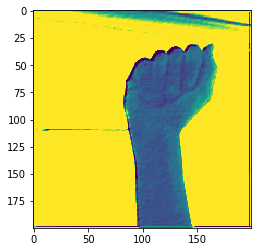

1      A_test.jpg


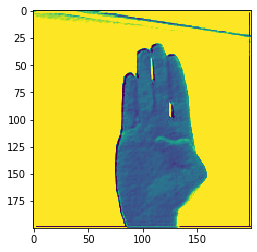

1      B_test.jpg


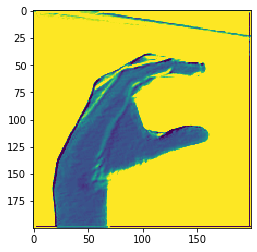

2      C_test.jpg


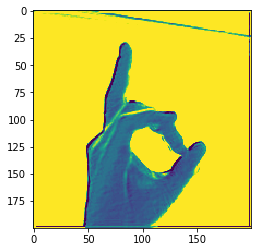

3      D_test.jpg


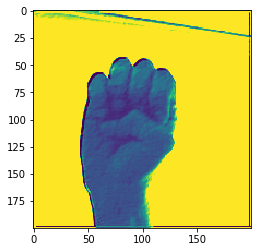

4      E_test.jpg


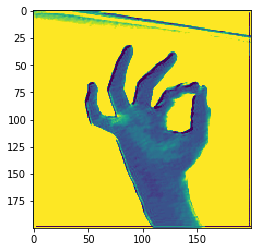

5      F_test.jpg


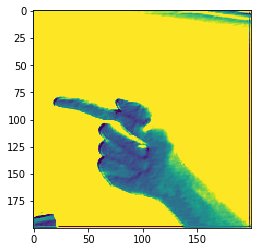

6      G_test.jpg


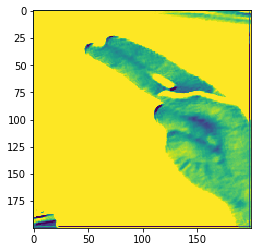

7      H_test.jpg


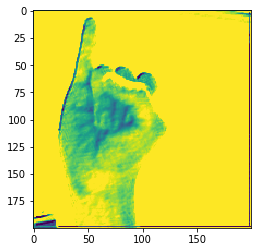

8      I_test.jpg


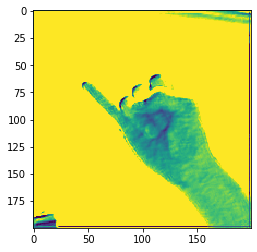

9      J_test.jpg


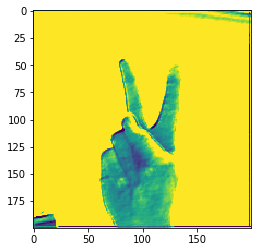

10      K_test.jpg


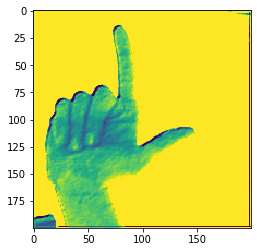

11      L_test.jpg


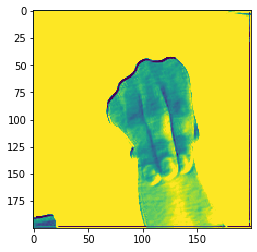

12      M_test.jpg


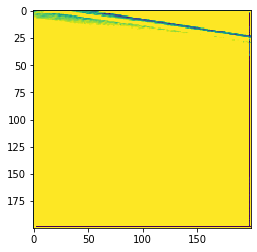

27      nothing_test.jpg


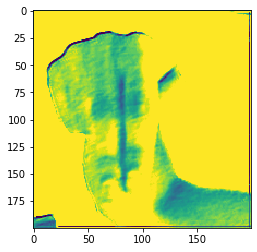

13      N_test.jpg


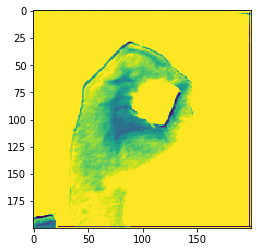

14      O_test.jpg


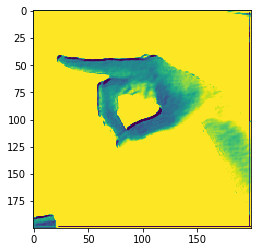

15      P_test.jpg


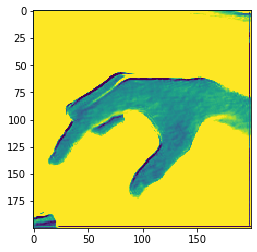

16      Q_test.jpg


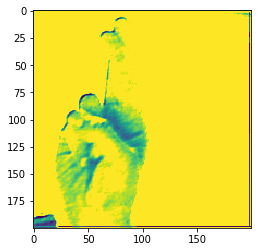

17      R_test.jpg


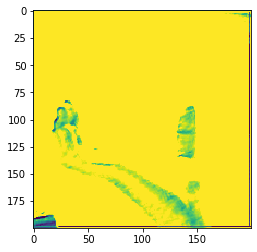

28      space_test.jpg


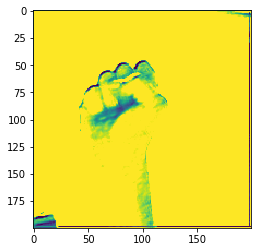

18      S_test.jpg


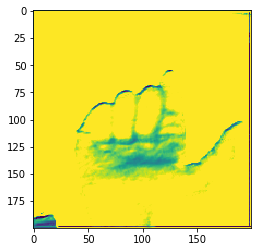

19      T_test.jpg


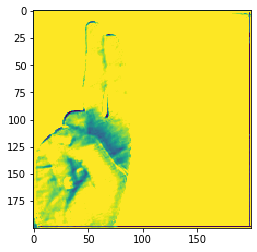

20      U_test.jpg


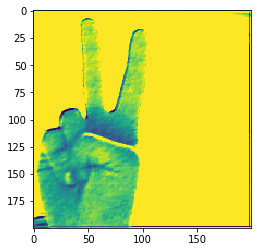

21      V_test.jpg


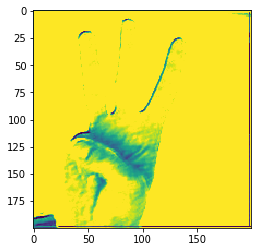

22      W_test.jpg


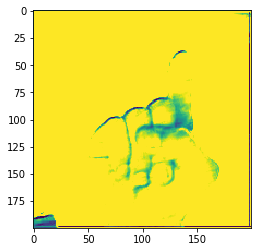

23      X_test.jpg


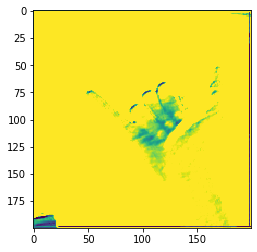

24      Y_test.jpg


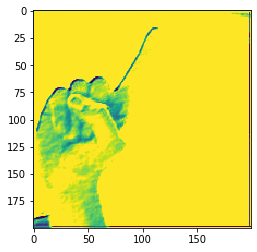

25      Z_test.jpg


In [235]:
for x in os.listdir('./'):
    img_name = x
    predicted = []
    x = cv2.imread(x)
    
    img_file=cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    sobel_y = np.array([[ -1, 0, -1], 
                        [ -3, 0, 3], 
                        [ 3, 0, 3]])
    img_file = cv2.filter2D(img_file, -1, sobel_y)
    plt.imshow(img_file)
    plt.show()
    img_file = skimage.transform.resize(img_file, (50,50,1))
    img_arr = np.asarray(img_file)
    arr = []
    arr.append(img_file)
    arr = np.asarray(arr)
    pre = model.predict(arr)[0]
#     print(pre)
    maxi = 0
    ind = -1
    for i,val in enumerate(pre):
#         print(val)
        if(maxi<val):
            maxi=val
            ind = i
    print(f'{ind}      {img_name}')
    predicted.append(ind)

#### IF we notice we are getting all predictions correct except the first one: Means we are getting approximately 97% test accuracy